In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
#Importing important libraries
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns
import sys
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Reading the dataset and converting it to a dataframe. This is stored as df
df = pd.read_csv('gdrive/MyDrive/Colab Notebooks/771767/Copy of Loan_Default.csv')
df

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [4]:
#A cursory look at some properties of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

## EXPLORATORY DATA ANALYSIS/DATA CLEANING

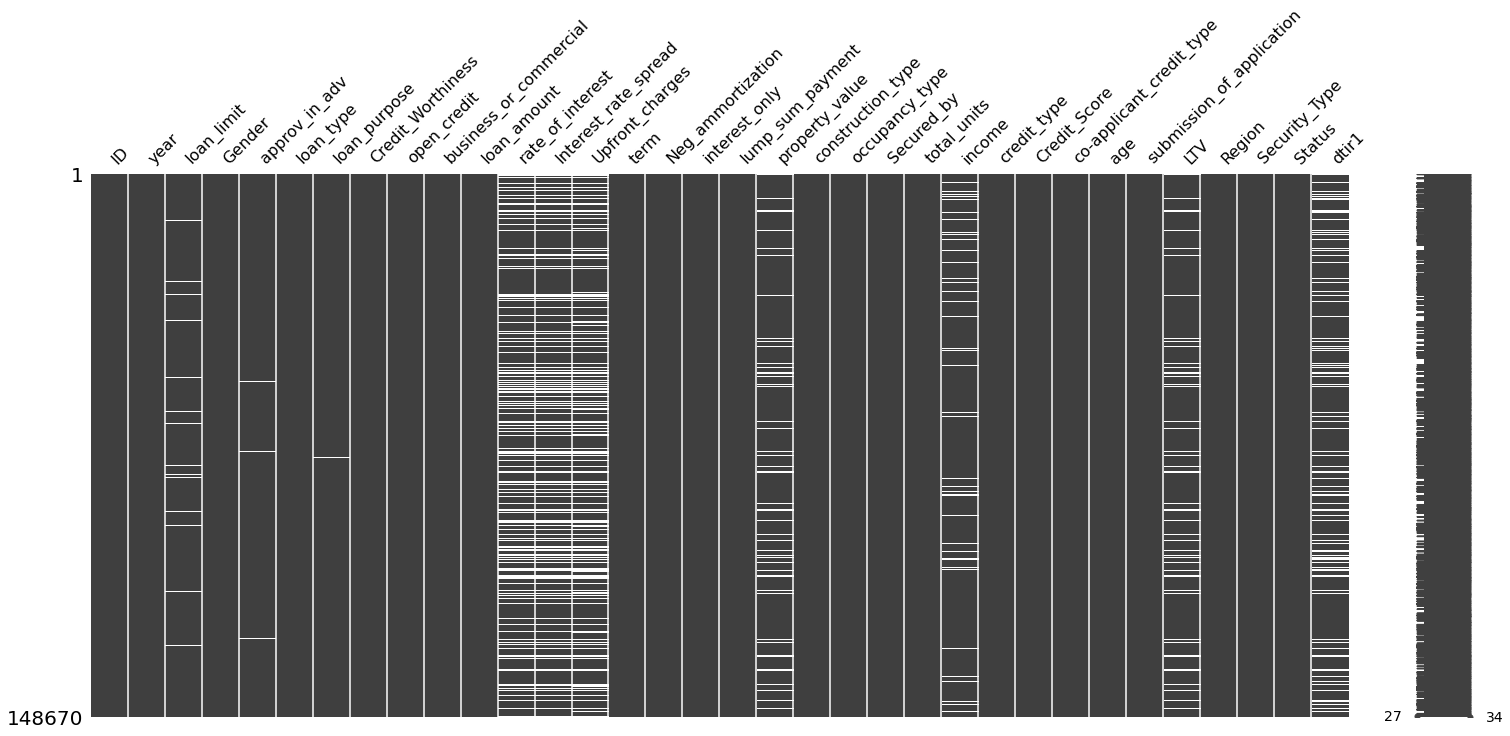

In [5]:
#A line plot to visualize missing values
msno.matrix(df)
plt.show()

In [6]:
#Checking the sum of NA values in each coumn of the dataset
df.isna().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [7]:
#Descriptive statistics of the dataset
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [8]:
#Changing the data type of the target variable to categorical and values to 0 and 1.
df['Status']=df['Status'].astype('category')
change={'Not Approved':0, 'Approved':1}
df['Status']=df['Status'].replace(change)
#Viewing that the change from previous cell is effected
df['Status']

0         1
1         1
2         0
3         0
4         0
         ..
148665    0
148666    0
148667    0
148668    0
148669    0
Name: Status, Length: 148670, dtype: category
Categories (2, int64): [0, 1]

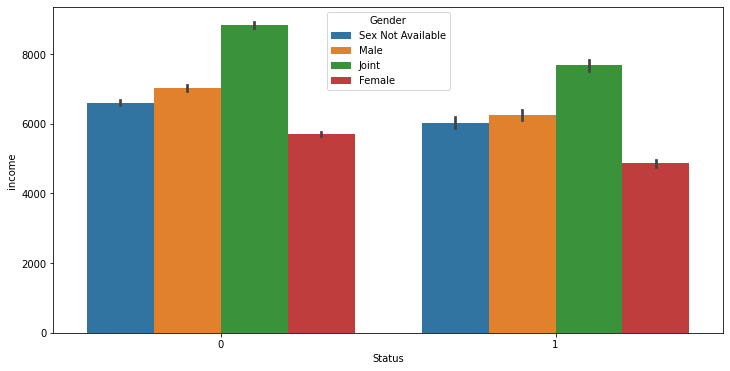

In [9]:
#Visualizing how income of played part in the outcome of loan application across different gender of applicants
fig,ax=plt.subplots()
sns.barplot(data=df,x='Status',y='income',hue='Gender')
fig.set_size_inches([12,6])
plt.show()

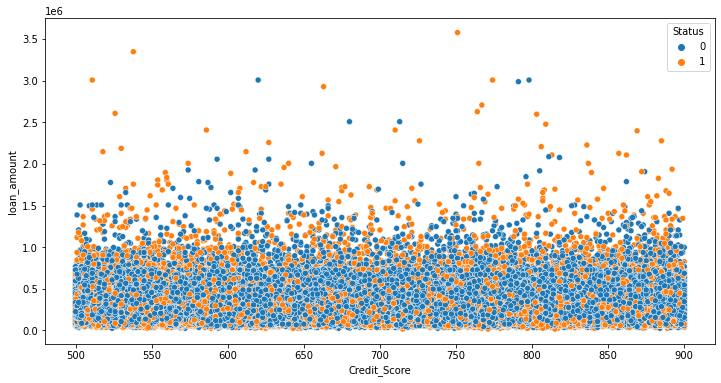

In [10]:
#Visualizing the relationship between credit score and loan amount of applicants and the eventual outcome of their loan application
fig,ax=plt.subplots()
sns.scatterplot(x='Credit_Score',y='loan_amount',data=df,hue='Status')
fig.set_size_inches([12,6])
plt.show()

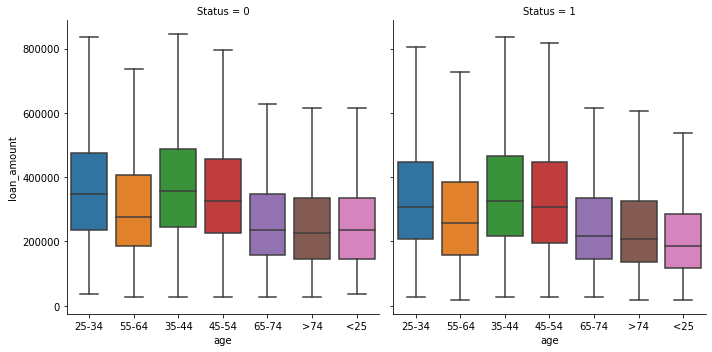

In [11]:
#A plot of age of applicants against loan amount
sns.catplot(data=df,x='age',y='loan_amount',kind='box',col='Status',sym="")

Feature vector ID is not useful, we can just drop it and if we have data of only one year, then it's not a timeseries problem. We can drop that as well.

In [12]:
#Checking the unique values in the year feature vector
df['year'].unique()

array([2019])

In [13]:
#Dropping ID and year feature vectors
df.drop(['ID', 'year'], axis=1, inplace=True)

In [14]:
#Replacing missing and inappropriate values based on information from the descriptive statistics of the data
df['Gender']= df['Gender'].replace(['Sex Not Available'], df['Gender'].mode())
df['rate_of_interest']= df['rate_of_interest'].fillna(df['rate_of_interest'].median())
df['Interest_rate_spread']=df['Interest_rate_spread'].fillna(df['Interest_rate_spread'].median())
df['Upfront_charges']=df['Upfront_charges'].fillna(df['Upfront_charges'].median())
df['term']=df['term'].fillna(df['term'].median())
df['property_value']=df['property_value'].fillna(df['property_value'].median())
df['income']=df['income'].fillna(df['income'].median())
df['LTV']=df['LTV'].fillna(df['LTV'].median())
df['dtir1']=df['dtir1'].fillna(df['dtir1'].median())

In [15]:
#Checking for remaining NAN values in the data
df.isna().sum()

loan_limit                   3344
Gender                          0
approv_in_adv                 908
loan_type                       0
loan_purpose                  134
Credit_Worthiness               0
open_credit                     0
business_or_commercial          0
loan_amount                     0
rate_of_interest                0
Interest_rate_spread            0
Upfront_charges                 0
term                            0
Neg_ammortization             121
interest_only                   0
lump_sum_payment                0
property_value                  0
construction_type               0
occupancy_type                  0
Secured_by                      0
total_units                     0
income                          0
credit_type                     0
Credit_Score                    0
co-applicant_credit_type        0
age                           200
submission_of_application     200
LTV                             0
Region                          0
Security_Type 

In [16]:
#Since the remaining NaN are in a rows that constitute on a minute fraction of the entire data, i will drop them. 
df = df.dropna()
df = df.reset_index(drop=True)
df.isna().sum()

loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status                       0
dtir1                        0
dtype: i

In [17]:
#Checking the representation of each value in the target variable
df['Status'].value_counts()

0    108713
1     35270
Name: Status, dtype: int64

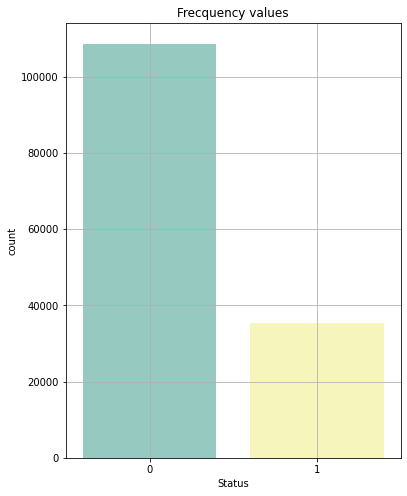

In [18]:
#A plot to visualize class representation in the label
plt.ax =plt.subplots(figsize=(6,8))
ax=sns.countplot(x='Status',data=df,palette="Set3")
plt.grid()
plt.title('Frecquency values');

**Classifying and storing all categorical columns in a list by checking for unique values < 10. We need to encode these columns.**

Before doing so, let's drop the target variable

In [19]:
#dropping the target label from the entire dataset
Target=df['Status']
df=df.drop('Status',axis=1)

In [20]:
#creating a data of categorical columns based on the number of unique values in each column
n_unique_values = 10
all_columns = df.columns.to_list()
categorical_columns = []

for i, column in enumerate(all_columns):
    temp = df.loc[:, column].unique()
    if len(temp) < n_unique_values:
        print (f"{i+1}. {column} has {len(temp)} unique values, which are {temp}") 
        categorical_columns.append(column)
del temp

1. loan_limit has 2 unique values, which are ['cf' 'ncf']
2. Gender has 3 unique values, which are ['Male' 'Joint' 'Female']
3. approv_in_adv has 2 unique values, which are ['nopre' 'pre']
4. loan_type has 3 unique values, which are ['type1' 'type2' 'type3']
5. loan_purpose has 4 unique values, which are ['p1' 'p4' 'p3' 'p2']
6. Credit_Worthiness has 2 unique values, which are ['l1' 'l2']
7. open_credit has 2 unique values, which are ['nopc' 'opc']
8. business_or_commercial has 2 unique values, which are ['nob/c' 'b/c']
14. Neg_ammortization has 2 unique values, which are ['not_neg' 'neg_amm']
15. interest_only has 2 unique values, which are ['not_int' 'int_only']
16. lump_sum_payment has 2 unique values, which are ['not_lpsm' 'lpsm']
18. construction_type has 2 unique values, which are ['sb' 'mh']
19. occupancy_type has 3 unique values, which are ['pr' 'sr' 'ir']
20. Secured_by has 2 unique values, which are ['home' 'land']
21. total_units has 4 unique values, which are ['1U' '2U' '3U

In [21]:
#viewing the categorical columns in the dataset
df[categorical_columns]

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,...,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
0,cf,Male,nopre,type1,p1,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,EXP,CIB,25-34,to_inst,south,direct
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,not_neg,not_int,...,sb,pr,home,1U,EQUI,EXP,55-64,to_inst,North,direct
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,neg_amm,not_int,...,sb,pr,home,1U,EXP,CIB,35-44,to_inst,south,direct
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,EXP,CIB,45-54,not_inst,North,direct
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,CRIF,EXP,25-34,not_inst,North,direct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143978,cf,Male,nopre,type1,p3,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,CIB,EXP,55-64,to_inst,south,direct
143979,cf,Male,nopre,type1,p1,l1,nopc,nob/c,not_neg,not_int,...,sb,ir,home,4U,CIB,CIB,25-34,not_inst,south,direct
143980,cf,Male,nopre,type1,p4,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,CIB,EXP,45-54,not_inst,North,direct
143981,cf,Female,nopre,type1,p4,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,EXP,EXP,55-64,to_inst,North,direct


In [22]:
#Separating the entire data into categorical and discrete so as to encode categorical data
cat_col=df[categorical_columns]
df=df.drop(categorical_columns,axis=1)

In [23]:
#Encoding categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_col = cat_col.apply(le.fit_transform)
cat_col

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,...,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
0,0,2,0,0,0,0,0,1,1,1,...,1,1,0,0,3,0,0,1,3,1
1,0,2,0,1,0,0,0,0,1,1,...,1,1,0,0,2,1,3,1,0,1
2,0,2,1,0,0,0,0,1,0,1,...,1,1,0,0,3,0,1,1,3,1
3,0,2,0,0,3,0,0,1,1,1,...,1,1,0,0,3,0,2,0,0,1
4,0,1,1,0,0,0,0,1,1,1,...,1,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143978,0,2,0,0,2,0,0,1,1,1,...,1,1,0,0,0,1,3,1,3,1
143979,0,2,0,0,0,0,0,1,1,1,...,1,0,0,3,0,0,0,0,3,1
143980,0,2,0,0,3,0,0,1,1,1,...,1,1,0,0,0,1,2,0,0,1
143981,0,0,0,0,3,0,0,1,1,1,...,1,1,0,0,3,1,3,1,0,1


In [24]:
#Joining the categorical column
df_new = pd.concat([df, cat_col], axis=1)
df_new

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,dtir1,...,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
0,116500,3.990,0.3904,2596.45,360.0,118000.0,1740.0,758,98.728814,45.0,...,1,1,0,0,3,0,0,1,3,1
1,206500,3.990,0.3904,2596.45,360.0,418000.0,4980.0,552,75.135870,39.0,...,1,1,0,0,2,1,3,1,0,1
2,406500,4.560,0.2000,595.00,360.0,508000.0,9480.0,834,80.019685,46.0,...,1,1,0,0,3,0,1,1,3,1
3,456500,4.250,0.6810,2596.45,360.0,658000.0,11880.0,587,69.376900,42.0,...,1,1,0,0,3,0,2,0,0,1
4,696500,4.000,0.3042,0.00,360.0,758000.0,10440.0,602,91.886544,39.0,...,1,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143978,436500,3.125,0.2571,9960.00,180.0,608000.0,7860.0,659,71.792763,48.0,...,1,1,0,0,0,1,3,1,3,1
143979,586500,5.190,0.8544,0.00,360.0,788000.0,7140.0,569,74.428934,15.0,...,1,0,0,3,0,0,0,0,3,1
143980,446500,3.125,0.0816,1226.64,180.0,728000.0,6900.0,702,61.332418,49.0,...,1,1,0,0,0,1,2,0,0,1
143981,196500,3.500,0.5824,4323.33,180.0,278000.0,7140.0,737,70.683453,29.0,...,1,1,0,0,3,1,3,1,0,1


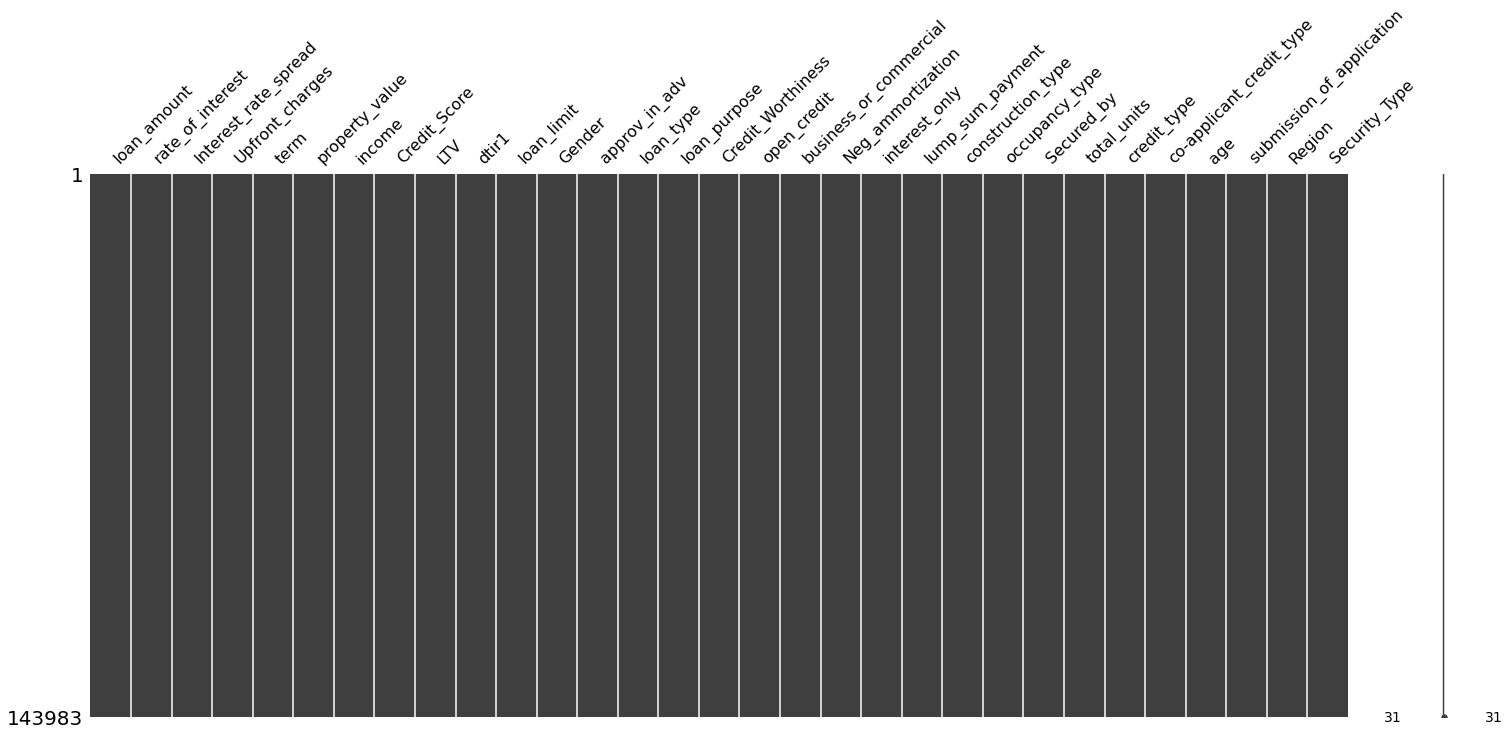

In [25]:
#A line plot to visualize missing values
msno.matrix(df_new)
plt.show()

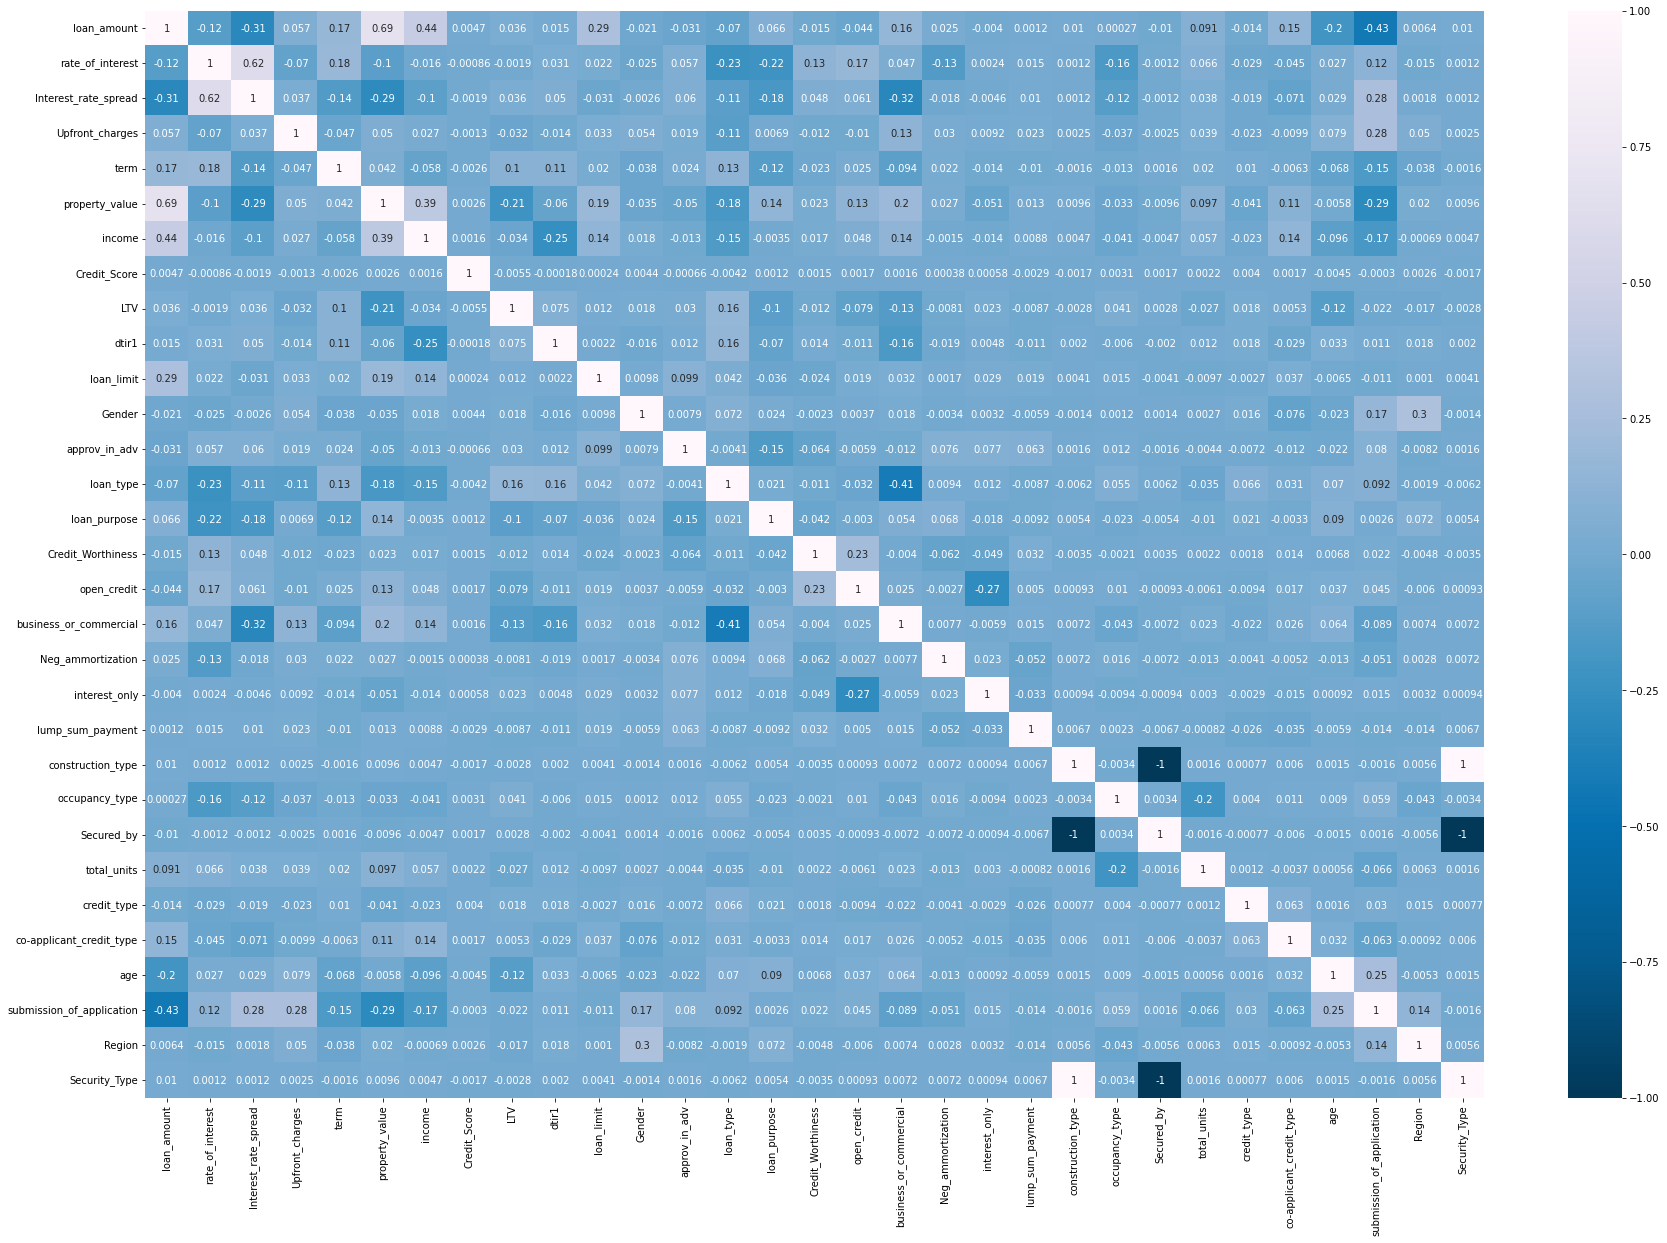

In [26]:
#Merging the target with the whole data to perform check for multicolinearity
df_corr = df_new.merge(Target.to_frame(), left_index=True, right_index=True)
#finding correlation of my dataset and plotting the map
correlation = df_new.corr()
plt.figure(figsize=(30,20))
sns.heatmap(correlation, cmap='PuBu_r', annot=True)
plt.show()

In [34]:
my_df = df_corr.sample(n=40000)
my_df = my_df.reset_index(drop=True)
my_df

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,dtir1,...,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type,Status
0,146500,4.990,1.2456,2577.69,360.0,178000.0,3240.0,637,82.303371,41.0,...,1,0,0,0,1,1,1,3,1,0
1,146500,4.250,0.1402,1390.00,360.0,138000.0,1860.0,596,106.159420,41.0,...,1,0,0,0,0,4,1,3,1,0
2,276500,3.990,0.3904,2596.45,360.0,308000.0,8280.0,538,89.772727,44.0,...,1,0,0,3,1,2,1,0,1,1
3,306500,3.625,0.0942,2596.45,360.0,518000.0,10620.0,800,59.169884,20.0,...,1,0,0,3,1,3,1,3,1,0
4,226500,3.990,0.3904,2596.45,360.0,358000.0,2040.0,576,63.268156,56.0,...,1,0,0,0,1,3,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,286500,4.250,0.7270,162.00,360.0,288000.0,2700.0,824,99.479167,53.0,...,1,0,0,3,0,4,1,3,1,0
39996,106500,3.990,0.3904,2596.45,360.0,418000.0,1080.0,739,75.135870,39.0,...,1,0,0,2,1,4,1,0,1,1
39997,406500,3.990,0.3904,2596.45,360.0,418000.0,13260.0,849,75.135870,39.0,...,1,0,0,2,1,2,1,0,1,1
39998,616500,3.990,0.3904,2596.45,360.0,658000.0,11460.0,643,93.693009,42.0,...,1,0,0,0,0,3,0,0,1,1


In [39]:
#separating the dataset into features and label
label = my_df['Status']
features = my_df.drop('Status',axis=1)

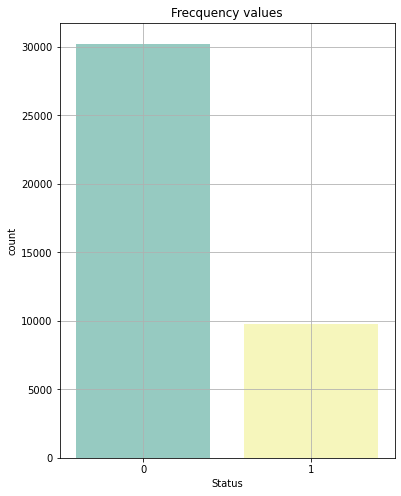

In [41]:
plt.ax =plt.subplots(figsize=(6,8))
ax=sns.countplot(x=label, palette="Set3")
#plt.xticks(rotation=90)
plt.grid()
plt.title('Frecquency values');

In [42]:
#Class balancing using smote
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X, y = sm.fit_resample(features, label.ravel())

In [43]:
#Scaling my feature vectors and saving it as X_scaled
from sklearn.preprocessing import scale
X_scaled=pd.DataFrame(scale(X))
X_scaled

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-0.933822,2.430930,2.274429,-0.146402,0.447645,-0.873988,-0.577667,-0.575227,0.377856,0.278605,...,0.022647,0.193497,-0.01076,-0.101888,-1.223590,1.004176,-0.799214,0.769386,1.203203,0.022647
1,-0.933822,0.581279,-0.753628,-0.664274,0.447645,-0.991078,-0.817314,-0.948940,1.427200,0.278605,...,0.022647,0.193497,-0.01076,-0.101888,-1.223590,-0.995841,1.270212,0.769386,1.203203,0.022647
2,-0.265252,-0.068599,-0.068247,-0.138222,0.447645,-0.493444,0.297567,-1.477608,0.706407,0.609887,...,0.022647,0.193497,-0.01076,-0.101888,1.481951,1.004176,-0.109405,0.769386,-0.988762,0.022647
3,-0.110967,-0.980927,-0.879637,-0.138222,0.447645,0.121280,0.703926,0.910512,-0.639706,-2.040374,...,0.022647,0.193497,-0.01076,-0.101888,1.481951,1.004176,0.580403,0.769386,1.203203,0.022647
4,-0.522394,-0.068599,-0.068247,-0.138222,0.447645,-0.347082,-0.786056,-1.131239,-0.459437,1.935018,...,0.022647,0.193497,-0.01076,-0.101888,-1.223590,1.004176,0.580403,0.769386,-0.988762,0.022647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60467,-0.625251,-0.068599,-0.068247,-0.138222,-1.144387,-0.434899,-0.543411,-0.083019,-0.473110,0.562689,...,0.022647,-3.302518,-0.01076,5.743805,-0.321743,-0.995841,-0.109405,-1.299738,-0.988762,0.022647
60468,-1.190964,-0.068599,-0.068247,-0.138222,0.447645,-0.171446,-0.839939,-0.566112,0.062582,0.057749,...,0.022647,0.193497,-0.01076,-0.101888,0.580104,1.004176,0.580403,0.769386,-0.988762,0.022647
60469,0.146176,-0.068599,-0.068247,-0.138222,0.447645,-0.171446,-0.290007,-0.584342,0.062582,0.057749,...,0.022647,0.193497,-0.01076,-0.101888,0.580104,1.004176,-0.799214,-1.299738,0.472548,0.022647
60470,-0.882393,-0.068599,-0.068247,-0.138222,-0.235603,-0.815443,-0.792521,0.627948,0.234329,2.300844,...,0.022647,0.193497,-0.01076,-0.101888,0.580104,-0.995841,-1.489022,0.769386,-0.988762,0.022647


In [44]:
#Import the PCA library and performing dimensionality reduction
from sklearn.decomposition import PCA
pca=PCA(n_components=8)
pca.fit(X_scaled)
X_pca=pca.transform(X_scaled)

In [45]:
#Splitting my features and label
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

In [46]:
print (f"Training dataset shape X_train.shape: {X_train.shape}")
print (f"Training dataset shape y_train.shape: {y_train.shape}")

Training dataset shape X_train.shape: (42330, 8)
Training dataset shape y_train.shape: (42330,)


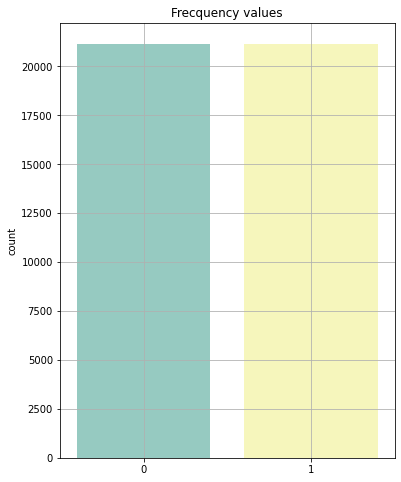

In [47]:
plt.ax =plt.subplots(figsize=(6,8))
ax=sns.countplot(x=y_train, palette="Set3")
#plt.xticks(rotation=90)
plt.grid()
plt.title('Frecquency values');

In [48]:
#Importing libraries for useful algorithms
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [49]:
#Assigning models to variables
gnb = GaussianNB()
dt=DecisionTreeClassifier(max_depth=10)
rf = RandomForestClassifier(n_estimators=20,n_jobs=-1,min_samples_leaf=0.01)

NAIVE BAYES CLASSIFIER USING DEFAULT PARAMETERS

In [50]:
#Training and testing the gnb model
gnb1 = gnb.fit(X_train, y_train)
y_pred = gnb1.predict(X_test)

print(f'Training Model: Gaussian Naive Beyes \n----------------------------------')
print(f'Training Accuracy: {gnb1.score(X_train, y_train)}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')

Training Model: Gaussian Naive Beyes 
----------------------------------
Training Accuracy: 0.5010630758327428
Testing Accuracy: 0.5003858450005512


DECISION TREE CLASSIFIER USING DEFAULT PARAMETERS

In [51]:
#Training and testing Decision Tree
dt1 = dt.fit(X_train, y_train)
y_pred = dt1.predict(X_test)

print(f'Training Model: Decision Tree \n----------------------------------')
print(f'Training Accuracy: {dt1.score(X_train, y_train)}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')

Training Model: Decision Tree 
----------------------------------
Training Accuracy: 0.8481927710843373
Testing Accuracy: 0.8082901554404145


RANDOM FOREST CLASSIFIER USING DEFAULT PARAMETERS

In [52]:
#Training and testing Random Forest
rf1 = rf.fit(X_train, y_train)
y_pred = rf1.predict(X_test)

print(f'Training Model: Decision Tree \n----------------------------------')
print(f'Training Accuracy: {rf1.score(X_train, y_train)}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')

Training Model: Decision Tree 
----------------------------------
Training Accuracy: 0.7906213087644697
Testing Accuracy: 0.7850292139786131


BASELINE MODEL: ANN

In [70]:
#importing useful NN libraries 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, InputLayer, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV, KFold
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model, Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [78]:
#Building my baseline model
model_base = Sequential()
model_base.add(Dense(units=1000, activation='sigmoid', input_shape=(X_train.shape[1],)))
model_base.add(Dropout(0.2))
model_base.add(Dense(units=50, activation='sigmoid'))
model_base.add(Dropout(0.2))
model_base.add(Dense(units=35, activation='sigmoid'))
model_base.add(Dropout(0.1))
model_base.add(Dense(1, activation='sigmoid'))

model_base.compile(loss = 'binary_crossentropy', optimizer = SGD(lr=0.1), metrics = ['accuracy', 'mse'])
model_base.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1000)              9000      
                                                                 
 dropout_3 (Dropout)         (None, 1000)              0         
                                                                 
 dense_10 (Dense)            (None, 50)                50050     
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense_11 (Dense)            (None, 35)                1785      
                                                                 
 dropout_5 (Dropout)         (None, 35)                0         
                                                                 
 dense_12 (Dense)            (None, 1)                

In [79]:
#Training my baseline model
%%time
batch_size = 1000
epochs = 20

history_base = model_base.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = epochs, batch_size = batch_size, verbose = 1, use_multiprocessing = True,)

Epoch 1/20
43/43 [==============================] - 5s 75ms/step - loss: 0.7083 - accuracy: 0.4954 - mse: 0.2571 - val_loss: 0.6933 - val_accuracy: 0.5000 - val_mse: 0.2501
Epoch 2/20
43/43 [==============================] - 3s 61ms/step - loss: 0.6988 - accuracy: 0.5005 - mse: 0.2528 - val_loss: 0.6930 - val_accuracy: 0.4764 - val_mse: 0.2499
Epoch 3/20
43/43 [==============================] - 2s 43ms/step - loss: 0.6984 - accuracy: 0.5013 - mse: 0.2526 - val_loss: 0.6928 - val_accuracy: 0.4831 - val_mse: 0.2498
Epoch 4/20
43/43 [==============================] - 2s 40ms/step - loss: 0.6978 - accuracy: 0.5044 - mse: 0.2523 - val_loss: 0.6930 - val_accuracy: 0.5000 - val_mse: 0.2500
Epoch 5/20
43/43 [==============================] - 2s 41ms/step - loss: 0.6970 - accuracy: 0.5027 - mse: 0.2519 - val_loss: 0.6925 - val_accuracy: 0.4998 - val_mse: 0.2497
Epoch 6/20
43/43 [==============================] - 2s 45ms/step - loss: 0.6965 - accuracy: 0.5055 - mse: 0.2516 - val_loss: 0.6923 - v

In [80]:
#Testing the model to ontain its performance
loss, acc, mse = model_base.evaluate(X_test, y_test)

567/567 [==============================] - 2s 4ms/step - loss: 0.6907 - accuracy: 0.5012 - mse: 0.2488


In [81]:
#Printing results
print (f"Loss: {loss:.3f}, Accuracy: {acc:.3f} and MSE: {mse:.3f}")

Loss: 0.691, Accuracy: 0.501 and MSE: 0.249


In [82]:
pred = model1.predict(X_test)
y_pred_base = list(map(lambda i: 1 if i > 0.5 else 0, pred))
accuracy_score(y_test, y_pred)

0.8760886341086981

In [83]:
acc = history_base.history['accuracy']
val_acc = history_base.history['val_accuracy']
loss = history_base.history['loss']
val_loss = history_base.history['val_loss']
epochs_range = range(epochs)

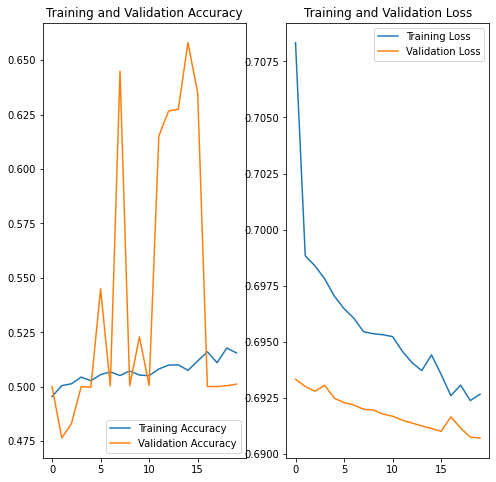

In [84]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc= 'upper right')
plt.title('Training and Validation Loss')
plt.savefig("water_quality_nn3.pdf", dpi=100)
plt.show()

MODEL1: GENERATED BY MANUAL TUNING OF HYPERPARAMETERS

In [59]:
model1 = Sequential(name="loan-defaulter-keras-ann")
model1.add( InputLayer(input_shape = (X_train.shape[1],), name="keras-input-layer") )
model1.add( Dense(units = 35, activation = 'leaky_relu', use_bias = True, name = 'second-dense-35-units') )
model1.add( Dense(units = 35, activation = 'leaky_relu', use_bias = True, name = 'third-dense-35-units') )
model1.add( Dense(units = 35, activation = 'leaky_relu', use_bias = True, name = 'fourth-dense-35-units') )
model1.add( Dense(units = 1, activation = 'sigmoid', use_bias = True, name = 'output_sigmoid') )

model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'mse'])
model1.summary()

Model: "loan-defaulter-keras-ann"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 second-dense-35-units (Dens  (None, 35)               315       
 e)                                                              
                                                                 
 third-dense-35-units (Dense  (None, 35)               1260      
 )                                                               
                                                                 
 fourth-dense-35-units (Dens  (None, 35)               1260      
 e)                                                              
                                                                 
 output_sigmoid (Dense)      (None, 1)                 36        
                                                                 
Total params: 2,871
Trainable params: 2,871
Non-trainable params: 0
________________________________________

In [60]:
%%time
batch_size = 1000
epochs = 20

history1 = model1.fit(
    X_train, 
    y_train,
    validation_data = (X_test, y_test), 
    epochs = epochs, 
    batch_size = batch_size,
    verbose = 1,
    use_multiprocessing = True,
)

Epoch 1/20
43/43 [==============================] - 2s 12ms/step - loss: 0.6092 - accuracy: 0.7059 - mse: 0.2087 - val_loss: 0.5336 - val_accuracy: 0.7647 - val_mse: 0.1757
Epoch 2/20
43/43 [==============================] - 0s 7ms/step - loss: 0.4763 - accuracy: 0.7828 - mse: 0.1548 - val_loss: 0.4210 - val_accuracy: 0.8069 - val_mse: 0.1353
Epoch 3/20
43/43 [==============================] - 0s 7ms/step - loss: 0.3965 - accuracy: 0.8176 - mse: 0.1278 - val_loss: 0.3716 - val_accuracy: 0.8349 - val_mse: 0.1185
Epoch 4/20
43/43 [==============================] - 0s 7ms/step - loss: 0.3642 - accuracy: 0.8349 - mse: 0.1168 - val_loss: 0.3536 - val_accuracy: 0.8439 - val_mse: 0.1125
Epoch 5/20
43/43 [==============================] - 0s 6ms/step - loss: 0.3500 - accuracy: 0.8418 - mse: 0.1119 - val_loss: 0.3444 - val_accuracy: 0.8482 - val_mse: 0.1092
Epoch 6/20
43/43 [==============================] - 0s 7ms/step - loss: 0.3411 - accuracy: 0.8469 - mse: 0.1087 - val_loss: 0.3368 - val_ac

In [61]:
loss, acc, mse = model1.evaluate(X_test, y_test)

567/567 [==============================] - 1s 2ms/step - loss: 0.2913 - accuracy: 0.8761 - mse: 0.0896


In [62]:
print (f"Loss: {loss:.3f}, Accuracy: {acc:.3f} and MSE: {mse:.3f}")

Loss: 0.291, Accuracy: 0.876 and MSE: 0.090


In [63]:
pred = model1.predict(X_test)
y_pred = list(map(lambda i: 1 if i > 0.5 else 0, pred))
accuracy_score(y_test, y_pred)

0.8760886341086981

In [64]:
confusion_matrix(y_test, y_pred)

array([[7519, 1552],
       [ 696, 8375]])

In [65]:
cm=confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Negatives(TN) = ', cm[0,0])

print('\nTrue Positives(TP) = ', cm[1,1])

print('\nFalse Negatives(FN) = ', cm[0,1])

print('\nFalse Positives(FP) = ', cm[1,0])

Confusion matrix

 [[7519 1552]
 [ 696 8375]]

True Negatives(TN) =  7519

True Positives(TP) =  8375

False Negatives(FN) =  1552

False Positives(FP) =  696


In [66]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative:0', 'Actual Positive:1'], 
                                 index=['Predict Negative:0', 'Predict Positive:1'])
cm_matrix.head()

,Actual Negative:0,Actual Positive:1
Predict Negative:0,7519,1552
Predict Positive:1,696,8375


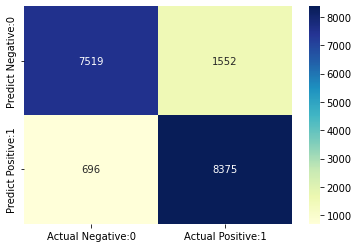

In [67]:
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [68]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs_range = range(epochs)

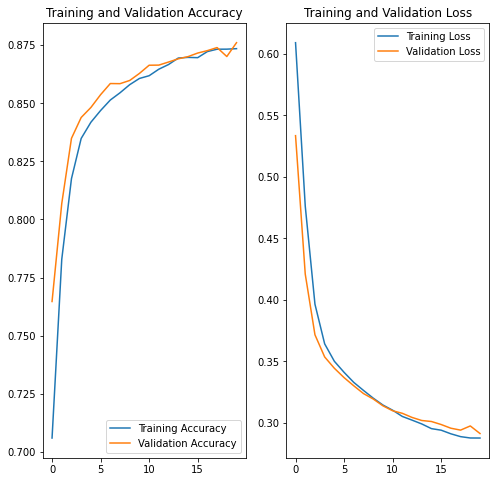

In [69]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc= 'upper right')
plt.title('Training and Validation Loss')
plt.savefig("water_quality_nn3.pdf", dpi=100)
plt.show()

In [77]:
# define and run the grid search model
# set a seed
seed = 4
np.random.seed(seed)


# define the model
def MyModel(lr, n1, n2, n3, n4, activation, init):
    
    model = Sequential()
    model.add(Dense(n1, input_dim=8, kernel_initializer=init, activation=activation))
    model.add(Dense(n2, kernel_initializer=init, activation=activation))
    model.add(Dense(n3, kernel_initializer=init, activation=activation))
    model.add(Dense(n4, kernel_initializer=init, activation=activation))
    model.add(Dense(1, activation='sigmoid'))

    
    optimizer = Adam(lr = lr)
    loss = 'binary_crossentropy'
    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy', 'mse'])
    return model

# create KerasClassifier model
model = KerasClassifier(build_fn=MyModel, verbose=1)

# set the grid search parameters
batch_size = [1000]
epochs = [20]
lr = [0.001, 0.01]
n1 = [10, 20, 30, 40]
n2 = [10, 20, 30]
n3 = [10, 20]
n4 = [10]
activation = ['elu', 'sigmoid', 'leaky_relu']
init = ['uniform', 'normal', 'zero']

# make a dictionary of grid search parameters for ANN
param_ann = dict(batch_size=batch_size, epochs=epochs, activation=activation, init=init, lr=lr, n1=n1, n2=n2, n3=n3, n4=n4)
# make and fit the ANN grid search model
gridModel_ann = GridSearchCV(estimator=model, param_grid=param_ann, cv=3, refit=True, verbose=1, n_jobs=-1)

# make a dictionary of grid search parameters for GNB
#param_gnb = dict(batch_size=batch_size, epochs=epochs, activation=activation, init=init, lr=lr, n1=n1, n2=n2, n3=n3, n4=n4)
# make and fit the GNB grid search model
#gridModel_gnb = GridSearchCV(estimator=model, param_grid=param_ann, cv=KFold(random_state=seed), refit=True, verbose=10, n_jobs=8)

# make a dictionary of grid search parameters for DT
param_DT = {'criterion':['gini', 'entropy'], 'max_depth':np.arange(1,100), 'min_samples_leaf':[1,4,12,20,40]}
# make and fit the DT grid search model
gridModel_DT = GridSearchCV(dt, param_grid=param_DT, cv=5)

# make a dictionary of grid search parameters for RF
param_RF = {'n_estimators':[100, 300, 500], 'min_samples_leaf':[1,4,12,20,40]}
# make and fit the RF grid search model
gridModel_RF = GridSearchCV(rf, param_grid=param_RF, cv=5)

def grid_cv_res(classifier, X_train, y_train):
  result = classifier.fit(X_train, y_train)
  return print(f"The best parameters for {classifier} are: {classifier.best_params_}")

grid_scv_list = [gridModel_ann, gridModel_DT, gridModel_RF]

for gscv in grid_scv_list:
  grid_cv_res(gscv, X_train, y_train)

#gridSearchResults = gridModel.fit(X_train, y_train)

# print some of the results
#print('Best: {} Using: {}'.format(gridSearchResults.best_score_, gridSearchResults.best_params_))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Epoch 1/20
43/43 [==============================] - 1s 5ms/step - loss: 0.5198 - accuracy: 0.7285 - mse: 0.1755
Epoch 2/20
43/43 [==============================] - 0s 5ms/step - loss: 0.3596 - accuracy: 0.8384 - mse: 0.1151
Epoch 3/20
43/43 [==============================] - 0s 4ms/step - loss: 0.3396 - accuracy: 0.8487 - mse: 0.1084
Epoch 4/20
43/43 [==============================] - 0s 4ms/step - loss: 0.3269 - accuracy: 0.8539 - mse: 0.1042
Epoch 5/20
43/43 [==============================] - 0s 4ms/step - loss: 0.3110 - accuracy: 0.8623 - mse: 0.0987
Epoch 6/20
43/43 [==============================] - 0s 5ms/step - loss: 0.3039 - accuracy: 0.8653 - mse: 0.0965
Epoch 7/20
43/43 [==============================] - 0s 4ms/step - loss: 0.3013 - accuracy: 0.8660 - mse: 0.0955
Epoch 8/20
43/43 [==============================] - 0s 4ms/step - loss: 0.2959 - accuracy: 0.8687 - mse: 0.0937
Epoch 9/20
43/43 [======================

TESTING THE RESULTS OF THE TUNED PARAMETERS

FEED FOWARD NEURAL NETWORKS

In [91]:
model1 = Sequential(name="loan-defaulter-keras-ann")
model1.add( InputLayer(input_shape = (X_train.shape[1],), name="keras-input-layer") )
model1.add( Dense(units = 20, activation = 'leaky_relu', use_bias = True, name = 'second-dense-35-units') )
model1.add( Dense(units = 10, activation = 'leaky_relu', use_bias = True, name = 'third-dense-35-units') )
model1.add( Dense(units = 10, activation = 'leaky_relu', use_bias = True, name = 'fourth-dense-35-units') )
model1.add( Dense(units = 1, activation = 'sigmoid', use_bias = True, name = 'output_sigmoid') )

model1.compile(loss = 'binary_crossentropy', optimizer = Adam(lr=0.01), metrics = ['accuracy', 'mse'])
model1.summary()

Model: "loan-defaulter-keras-ann"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 second-dense-35-units (Dens  (None, 20)               180       
 e)                                                              
                                                                 
 third-dense-35-units (Dense  (None, 10)               210       
 )                                                               
                                                                 
 fourth-dense-35-units (Dens  (None, 10)               110       
 e)                                                              
                                                                 
 output_sigmoid (Dense)      (None, 1)                 11        
                                                                 
Total params: 511
Trainable params: 511
Non-trainable params: 0
____________________________________________

In [92]:
%%time
batch_size = 1000
epochs = 40

history1 = model1.fit(
    X_train, 
    y_train,
    validation_data = (X_test, y_test), 
    epochs = epochs, 
    batch_size = batch_size,
    verbose = 1,
    use_multiprocessing = True,
)

Epoch 1/40
43/43 [==============================] - 1s 10ms/step - loss: 0.4942 - accuracy: 0.7507 - mse: 0.1658 - val_loss: 0.3785 - val_accuracy: 0.8276 - val_mse: 0.1207
Epoch 2/40
43/43 [==============================] - 0s 5ms/step - loss: 0.3639 - accuracy: 0.8352 - mse: 0.1164 - val_loss: 0.3403 - val_accuracy: 0.8507 - val_mse: 0.1080
Epoch 3/40
43/43 [==============================] - 0s 6ms/step - loss: 0.3340 - accuracy: 0.8515 - mse: 0.1062 - val_loss: 0.3227 - val_accuracy: 0.8581 - val_mse: 0.1017
Epoch 4/40
43/43 [==============================] - 0s 5ms/step - loss: 0.3179 - accuracy: 0.8587 - mse: 0.1009 - val_loss: 0.3128 - val_accuracy: 0.8635 - val_mse: 0.0983
Epoch 5/40
43/43 [==============================] - 0s 6ms/step - loss: 0.3091 - accuracy: 0.8612 - mse: 0.0982 - val_loss: 0.3093 - val_accuracy: 0.8652 - val_mse: 0.0968
Epoch 6/40
43/43 [==============================] - 0s 5ms/step - loss: 0.3056 - accuracy: 0.8652 - mse: 0.0968 - val_loss: 0.3034 - val_ac

In [98]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs_range = range(epochs)

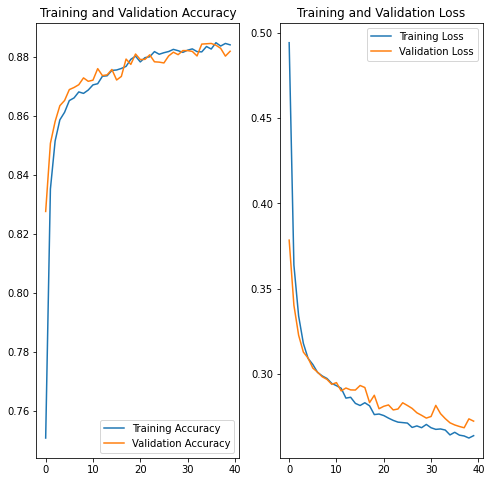

In [99]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc= 'upper right')
plt.title('Training and Validation Loss')
plt.savefig("water_quality_nn3.pdf", dpi=100)
plt.show()

RANDOM FOREST OPTIMIZED

In [95]:
dt2=DecisionTreeClassifier(max_depth=18, criterion='gini', min_samples_leaf=1)
rf2 = RandomForestClassifier(n_estimators=500,n_jobs=-1,min_samples_leaf=1, criterion='gini')

In [96]:
#Training and testing Decision Tree
dt_opt = dt2.fit(X_train, y_train)
y_pred = dt_opt.predict(X_test)

print(f'Training Model: Decision Tree \n----------------------------------')
print(f'Training Accuracy: {dt_opt.score(X_train, y_train)}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')

Training Model: Decision Tree 
----------------------------------
Training Accuracy: 0.9591542641152847
Testing Accuracy: 0.8251570940359387


DECICION TREE OPTIMIZED

In [97]:
#Training and testing Random Forest
rf_opt = rf2.fit(X_train, y_train)
y_pred = rf_opt.predict(X_test)

print(f'Training Model: Decision Tree \n----------------------------------')
print(f'Training Accuracy: {rf_opt.score(X_train, y_train)}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')

Training Model: Decision Tree 
----------------------------------
Training Accuracy: 1.0
Testing Accuracy: 0.883419689119171
